In [9]:
import pandas as pd
import numpy as np
import re

In [10]:
df = pd.read_csv('data/personnes.csv')
print(df.head(7))

df.info()
print()
print(df.isnull().sum())

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  Côte d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5             24  3.45m  
6          Bénin  1.45m  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   prenom          7 non-null      object
 1   email     

# Traitement de la taille
on supprime la dernière lettre, on cast en numérique. Tous les `NaN` sont remplacés par la moyenne des tailles

In [11]:
df['taille'] = df['taille'].str[:-1]
df['taille'] = pd.to_numeric(df['taille'], errors='coerce')
df.loc[df['taille'].isnull(), 'taille'] = df['taille'].mean()
df.head(7)

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.490000
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.670000
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.841667
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.650000
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.340000
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.450000
6,samuël,samuel_329@example.com,NaN,Bénin,1.450000


# Outliers

<Axes: xlabel='taille'>

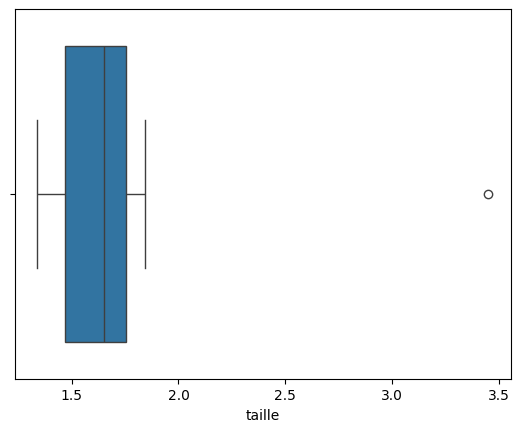

In [12]:
import seaborn as sns

sns.boxplot(data=df, x='taille')

# Traitement des pays

In [13]:
print(df['pays'].unique()) # -> ['France' nan "Côte d'ivoire" 'Madagascar' '24' 'Bénin']
PAYS = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne', 'USA']
mask = ~df['pays'].isin(PAYS) # on inverse la condition avec ~
df.loc[mask, 'pays'] = np.NaN
df.head(10)

['France' nan "Côte d'ivoire" 'Madagascar' '24' 'Bénin']


,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.490000
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.670000
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.841667
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.650000
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.340000
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.450000
6,samuël,samuel_329@example.com,NaN,Bénin,1.450000


# Doublon

In [19]:
df.loc[df['email'].duplicated(keep=False), :]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
6,samuël,samuel_329@example.com,NaN,Bénin,1.45
